<a href="https://colab.research.google.com/github/duartejr/blue_edtech/blob/master/M1/modulo01_aula17_codelab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 17 - [CODELAB] Introdução ao Pandas - Parte 1

## Exercicios

Faça uma pesquina na internet e busque os seguintes dados:
* Nome dos estados brasileiros;
* Sigla dos estados;
* Região;
* Capital;
* Polulação

Adicione estas informações em um Dataframe;

In [ ]:
import pandas as pd

df_estados = pd.read_excel('populacao-e-pib-por-estados (1).xlsx')
df_estados.head()

,Sigla,Estado,População,Região,Capital
0,AC,Acre,732793,Norte,Rio Branco
1,AL,Alagoas,3120922,Nordeste,Maceió
2,AP,Amapá,668689,Norte,Macapá
3,AM,Amazonas,3480937,Norte,Manaus
4,BA,Bahia,14021432,Nordeste,Salvador


Exiba na tela apenas a sigla e a população;

(0.0, 41752160.0)

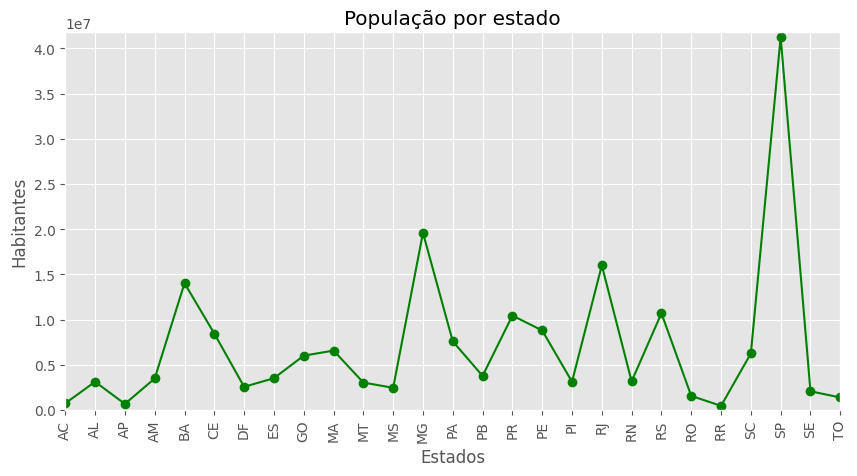

In [ ]:
#df_estados[['Sigla', 'População']]
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 5), dpi=100)
plt.plot(df_estados['População'], '-og', lw=1.5)
plt.title('População por estado')
plt.ylabel('Habitantes')
plt.xlabel('Estados')
plt.xticks(range(0, len(df_estados)), df_estados['Sigla'], rotation=90)
plt.xlim(0, len(df_estados)-1)
plt.ylim(0, df_estados['População'].max()+500_000)

<BarContainer object of 27 artists>

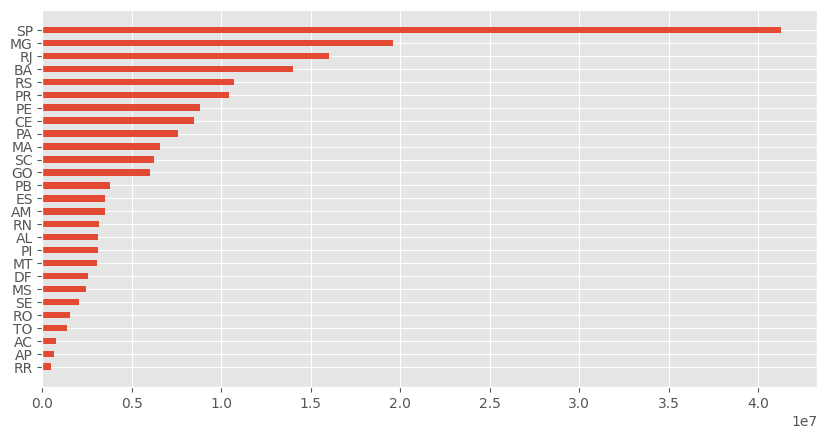

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5), dpi=100)
df_estados = df_estados.sort_values('População')
plt.barh(df_estados['Sigla'], df_estados['População'], height=.5)

Qual o estado com a maior população?

In [ ]:
df_estados[df_estados['População'] == df_estados['População'].max()]

,Sigla,Estado,População,Região,Capital
24,SP,São Paulo,41252160,Sudeste,São Paulo


Qual a quantidade de estados?

In [ ]:
df_estados['Estado'].count()

27

Crie novos Dataframes a partir do conjunto principal. Crie um Dataframe para cada uma das regiões.

In [ ]:
df_norte = df_estados.loc[df_estados['Região'] == 'Norte']
df_sul = df_estados.loc[df_estados['Região'] == 'Sul']
df_nordeste = df_estados.loc[df_estados['Região'] == 'Nordeste']
df_sudeste = df_estados.loc[df_estados['Região'] == 'Sudeste']
df_centro_oeste = df_estados.loc[df_estados['Região'] == 'Centro-Oeste']

Quantidade de estados por região?


In [ ]:
for regiao in df_estados['Região'].unique():
    estados_regiao = df_estados.loc[df_estados['Região'] == regiao]
    print(f"Estados da região {regiao} = {len(estados_regiao)}")

Estados da região Norte = 7
Estados da região Nordeste = 9
Estados da região Centro-Oeste = 4
Estados da região Sudeste = 4
Estados da região Sul = 3


Polulação total de cada região?


In [ ]:
estados_regiao = df_estados.groupby(df_estados['Região']).sum()
estados_regiao

,População
Região,
Centro-Oeste,14050340
Nordeste,53078137
Norte,15865678
Sudeste,80353724
Sul,27384815


Qual região com a maior população?


In [ ]:
estados_regiao[estados_regiao['População'] == estados_regiao['População'].max()]

,População
Região,
Sudeste,80353724


Qual a região com a menor população?


In [ ]:
estados_regiao[estados_regiao['População'] == estados_regiao['População'].min()]

,População
Região,
Centro-Oeste,14050340


Qual a população média de cada região?

In [ ]:
df_estados.groupby(df_estados['Região']).mean()

,População
Região,
Centro-Oeste,3.512585e+06
Nordeste,5.897571e+06
Norte,2.266525e+06
Sudeste,2.008843e+07
Sul,9.128272e+06


In [ ]:
df_estados.groupby(df_estados['Região']).max()

,Sigla,Estado,População,Capital
Região,,,,
Centro-Oeste,MT,Mato Grosso do Sul,6004045,Goiânia
Nordeste,SE,Sergipe,14021432,Teresina
Norte,TO,Tocantins,7588078,Rio Branco
Sudeste,SP,São Paulo,41252160,Vitória
Sul,SC,Santa Catarina,10695532,Porto Alegre


In [ ]:
df_estados.groupby(df_estados['Região']).min()

,Sigla,Estado,População,Capital
Região,,,,
Centro-Oeste,DF,Distrito Federal,2449341,Brasília
Nordeste,AL,Alagoas,2068031,Aracaju
Norte,AC,Acre,451227,Belém
Sudeste,ES,Espírito Santo,3512672,Belo Horizonte
Sul,PR,Paraná,6249682,Curitiba
